# Importing Packages

In [55]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as mat

# Loading Dataset

In [34]:
data=datasets.load_iris()
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [82]:
df=pd.DataFrame(data.data,columns=data.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# Dataset Description

## Dataset Shape

In [41]:
df.shape

(150, 4)

## Dataset Statistical Information

In [42]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Dataset Other Information

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


## Checking Null Values in the data

In [46]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

# Unsupervised Learning

## KMeans Clustering

In [47]:
from sklearn.cluster import KMeans

In [49]:
x=df.loc[:,:]

## Identification of ideal value of n clusters using Elbow Graph

In [72]:
n_range=range(1,10)
inertia=list()
for i in n_range:
    obj=KMeans(n_clusters=i)
    obj.fit_predict(x)
    inertia.append(obj.inertia_)

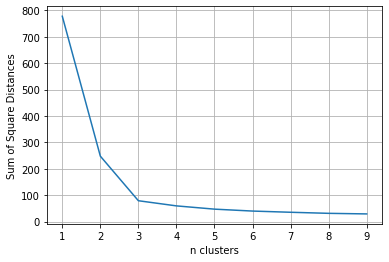

In [75]:
mat.plot(n_range,inertia)
mat.grid()
mat.xlabel("n clusters")
mat.ylabel("Sum of Square Distances")
mat.show()

In [51]:
model=KMeans(n_clusters=3,random_state=0)
model.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [53]:
output=model.fit_predict(x)

In [54]:
df['cluster']=output
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


## Visualization of clusters

### between plot of sepal length and sepal width

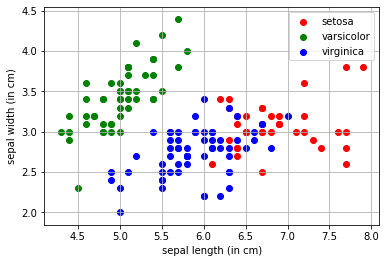

In [80]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
mat.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='red',label='setosa')
mat.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'],color='green',label='varsicolor')
mat.scatter(df3['sepal length (cm)'],df3['sepal width (cm)'],color='blue',label='virginica')
mat.xlabel("sepal length (in cm)")
mat.legend()
mat.ylabel("sepal width (in cm)")
mat.grid()
mat.show()

### between plot of petal length and petal width

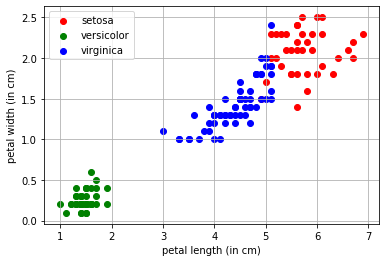

In [79]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
mat.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='red',label='setosa')
mat.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='green',label='versicolor')
mat.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color='blue',label='virginica')
mat.xlabel("petal length (in cm)")
mat.ylabel("petal width (in cm)")
mat.legend()
mat.grid()
mat.show()

In [77]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')